# IWGGMS 21 - June 9th-12th, Takamtasu, Japan

Welcome to the interactive demonstration of our new retrieval toolkit, created by the University of Maryland and NASA Goddard Space Flight Center! In this demonstration, we will run an application to retrieve XCO$_2$ from an OCO-2 measurement. The application itself is an independent implementation of NASA's ACOS algorithm.

**Purpose of this demonstration**

This notebook is meant to demonstrate some essential design features of the RetrievalToolbox software. To show its versatility, we chose to provide an example based on an implementation of NASA's ACOS algorithm, which is on the high end of the complexity scale. To successfully retrieve XCO$_2$ from an OCO-2 measurement, as we show here, the retrieval algorithm must be capable of producing radiances from polarized RT model and ideally account for weak scattering from various aerosols.

<div class="alert alert-block alert-warning">
<b>Note regarding performance</b> When aerosols are retrieved in this demonstration set-up, an iteration with all three bands takes ~60-90s each, so the cell that executes the retrieval will take about ~5-10min to complete (depending on the utilization of the virtual machines). Due to Julia's ahead-of-time compilation, the first iteration will also take roughly twice as long as the following ones.
Further, the performance demonstrated here is not necessarily indicative of the potential performance of the system, we are aware of current bottlenecks that will be worked on in the future.
</div>

**Acknowledgements and References**

Spectroscopy tables were provided by NASA JPL


**Quick how-to**

When loading this interactive notebook, it will appear rather empty - the so-called *cells* which trigger the live computations have not been pre-executed. To launch the computation of a cell, simply click on the cell below, and press **SHIFT+ENTER**. The computation is triggered and the next cell becomes active. This way, you can go cell-by-cell and follow the narrative of this notebook. Alternatively, you can navigate to the menu bar on the top left and select "Run -> Run All Cells", which will automatically execute all cells in order.

## Set-up and choosing configuration

In [1]:
# Point us to the location of the XRTM RT library
if !(haskey(ENV, "XRTM_PATH"))
    ENV["XRTM_PATH"] = joinpath(ENV["HOME"], "xrtm");
end

# Let us observe the progress during the RT computations, set this to "0" if you don't want progress bars
ENV["XRTM_PROGRESS"] = "1";


# For good font rendering, we suggest installing the "JuliaMono" font
# which provides full support for the various Unicode glyphs.
#ENV["GKS_FONTPATH"] = "~/Library/Fonts/"

In [2]:
# Activate Plotting
using Plots, LaTeXStrings
gr()

Plots.GRBackend()

In [3]:
Plots.default()

# Set fonts
Plots.default(
    fontfamily = "DejaVuSansMono",
    titlefont = (10, "DejaVuSansMono"),
    legendfont = (8, "DejaVuSansMono"),
    guidefont = (8, "DejaVuSansMono", :black),
    tickfont = (8, "DejaVuSansMono", :black),
    rightmargin=5Plots.mm,
    leftmargin=5Plots.mm,
    bottommargin=5Plots.mm
);

## Run the retrieval

Below is the cell which runs the retrieval for an example scene, a real measurement from NASAs OCO-2. Feel free to experiment with any of these major settings. You can easily change the 3-band retrieval to a 2-band retrieval by changing the follwing line

    "--spec", "1,2,3",

to

    "--spec", "1,2",

which would only retrieve the O$_2$ A-band (1) and the Weak CO$_2$ band (2), omitting the Strong CO$_2$ band (3). Or you can do a single-band retrieval by just writing only one of the three numbers:

    "--spec", "3",

Note that the demonstration algorithm adjust the retrival state vector according to the band choices. For example, surface pressure is only retrieved when the O$_2$ A-band (1) is retrieved. Similarly, the CO$_2$ profile is only retrieved when either band 2 or 3 are included (or both).

Further, you can switch off the aerosol retrieval by changing

    "--aerosols", "true",

to 

    "--aerosols", "false",



**Run the retrieval!**

The cell below will execute the retrieval according to the set-up that is provided through the arguments in the list `my_args`. Some amount of output will follow, depending on how many iterations are performed etc.

In [4]:
## Define command-line arguments

my_args = [
    "--solar_model",  "./example_data/l2_solar_model.h5", # Path to the solar model file
    "--L1b", "./example_data/2021030111564431_inputs.h5", # Path to the L1B data location
    "--L2Met", "./example_data/2021030111564431_inputs.h5", # Path to the L2Met data location
    "--L2CPr", "./example_data/2021030111564431_inputs.h5", # Path to the L2CPr data location
    #######################################################
    "--sounding_id", "2021030111564431", # Sounding ID to retrieve
    "--spec", "1,2,3", # Which spectra to retrieve? 1 = O2-A, 2 = Weak CO2 (1.6 µm), 3 = Strong CO2 (2.06 µm)
    "--aerosols", "true", # Co-retrieve aerosol parameters? (height, width, AOD)
    "--o2_scale", "1.0048", # Spectroscopy scaling factor for Oxygen
    "--co2_scale_weak", "0.994", # Spectroscopy scaling factor for CO2 for the weak CO2 band
    "--co2_scale_strong", "0.998", # Spectroscopy scaling factor for CO2 for the strong CO2 band
    "--gamma", "2000.0", # Levenberg-Marquardt γ parameter (to avoid diverging steps, we make this large)
    "--dsigma_scale", "5.0", # dσ^2 ~ a parameter that controls convergence, make this bigger for faster convergence
    "--max_iterations", "10", # Number of maximal iterations
]

# Get rid of existing command line arguments
empty!(ARGS)

# Push them in
for a in my_args
    push!(ARGS, a)
end

# Run the retrieval and return the Buffer and Solver objects! 
# (Note! This will take several minutes)
@time buf, solver, fm_kwargs = include("acos-goddard/run.jl");

[ Info: Loading XRTM from /home/jovyan/xrtm/interfaces
[ Info: Processing O2 A-band
[ Info: Processing Weak CO2 band
[ Info: Processing Strong CO2 band
[ Info: Reading in scene inputs ...
[ Info: Pulling CO2 priors from ./example_data/2021030111564431_inputs.h5
[ Info: Reading ISRF and dispersion tables
[ Info: Reading retrieval inputs
[ Info: Loading measurement arrays.
[ Info: Loading bad samples and spike flags.
[ Info: Done.
[ Info: Packing into Dicts.
[ Info: Closing L1B and L2Met files.
[ Info: Pulling CO2 priors from ./example_data/2021030111564431_inputs.h5
[ Info: Reading ISRF and dispersion tables
[ Info: Reading retrieval inputs
[ Info: Loading measurement arrays.
[ Info: Loading bad samples and spike flags.
[ Info: Done.
[ Info: Packing into Dicts.
[ Info: Closing L1B and L2Met files.
[ Info: Pulling CO2 priors from ./example_data/2021030111564431_inputs.h5
[ Info: Reading ISRF and dispersion tables
[ Info: Reading retrieval inputs
[ Info: Loading measurement arrays.
[ Info

139.576336 seconds (160.35 M allocations: 13.022 GiB, 1.58% gc time, 43.49% compilation time: <1% of which was recompilation)


[ Info: Successful iteration #1
[ Info: Length of SV: 2
[ Info: SpectralWindow: strong_co2: χ² =  1612.555859227616
[ Info: SpectralWindow: weak_co2: χ² =  1123.9947124612129
[ Info: SpectralWindow: o2: χ² =  1553.2456336684625
[ Info: Δσ² = 3.3246184145435244e6 (270.0)
┌ Warning: Spectroscopy for GasAbsorber: H2O out-of-bounds. Gas optical depth values for some spectral points will be zero.
└ @ RetrievalToolbox /srv/julia/pkg/packages/RetrievalToolbox/df1kb/src/optical_properties.jl:365
┌ Warning: Spectroscopy for GasAbsorber: H2O out-of-bounds. Gas optical depth values for some spectral points will be zero.
└ @ RetrievalToolbox /srv/julia/pkg/packages/RetrievalToolbox/df1kb/src/optical_properties.jl:365
[ Info: Performing RT calculations for SpectralWindow: weak_co2 ...
(Nthread=1) XRTM loop SpectralWindow: weak_co2 for solver(s): single 100%|██████████| Time: 0:00:11
(Nthread=1) XRTM loop SpectralWindow: weak_co2 for solver(s): two_stream 100%|██████████| Time: 0:00:09
[ Info: Perfo

 76.881691 seconds (60.29 M allocations: 2.039 GiB, 0.90% gc time, 0.67% compilation time: 2% of which was recompilation)


[ Info: Successful iteration #2
[ Info: Length of SV: 3
[ Info: SpectralWindow: strong_co2: χ² =  7.766217425246753
[ Info: SpectralWindow: weak_co2: χ² =  11.23325330208364
[ Info: SpectralWindow: o2: χ² =  20.92118282637819
[ Info: Δσ² = 14108.845845457881 (270.0)
┌ Warning: Spectroscopy for GasAbsorber: H2O out-of-bounds. Gas optical depth values for some spectral points will be zero.
└ @ RetrievalToolbox /srv/julia/pkg/packages/RetrievalToolbox/df1kb/src/optical_properties.jl:365
┌ Warning: Spectroscopy for GasAbsorber: H2O out-of-bounds. Gas optical depth values for some spectral points will be zero.
└ @ RetrievalToolbox /srv/julia/pkg/packages/RetrievalToolbox/df1kb/src/optical_properties.jl:365
[ Info: Performing RT calculations for SpectralWindow: weak_co2 ...
(Nthread=1) XRTM loop SpectralWindow: weak_co2 for solver(s): single 100%|██████████| Time: 0:00:10
(Nthread=1) XRTM loop SpectralWindow: weak_co2 for solver(s): two_stream 100%|██████████| Time: 0:00:08
[ Info: Performin

 74.206153 seconds (60.29 M allocations: 2.039 GiB, 0.29% gc time, 0.68% compilation time)


[ Info: Successful iteration #3
[ Info: Length of SV: 4
[ Info: SpectralWindow: strong_co2: χ² =  5.609812621961994
[ Info: SpectralWindow: weak_co2: χ² =  8.787900431414364
[ Info: SpectralWindow: o2: χ² =  8.988413734508987
[ Info: Δσ² = 688.6000455644772 (270.0)
┌ Warning: Spectroscopy for GasAbsorber: H2O out-of-bounds. Gas optical depth values for some spectral points will be zero.
└ @ RetrievalToolbox /srv/julia/pkg/packages/RetrievalToolbox/df1kb/src/optical_properties.jl:365
┌ Warning: Spectroscopy for GasAbsorber: H2O out-of-bounds. Gas optical depth values for some spectral points will be zero.
└ @ RetrievalToolbox /srv/julia/pkg/packages/RetrievalToolbox/df1kb/src/optical_properties.jl:365
[ Info: Performing RT calculations for SpectralWindow: weak_co2 ...
(Nthread=1) XRTM loop SpectralWindow: weak_co2 for solver(s): single 100%|██████████| Time: 0:00:10
(Nthread=1) XRTM loop SpectralWindow: weak_co2 for solver(s): two_stream 100%|██████████| Time: 0:00:08
[ Info: Performing

 72.017721 seconds (60.28 M allocations: 2.039 GiB, 0.30% gc time, 0.68% compilation time)
Posterior state vector
                                                Name                     Units │       Value  Uncertainty  Uncertainty  Uncertainty           AK
                                                                               │                  (total)  (smoothing)      (noise) 
───────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────
                                  SurfacePressureSVE                       hPa │     965.522      1.09863     0.764329     0.789168     0.924563
    AerosolOpticalDepthSVE (log) [GaussAerosol: Ice]                           │    -5.76624     0.306493     0.280983     0.122419     0.971007
                AerosolHeightSVE [GaussAerosol: Ice]                           │  -0.0482313     0.148886     0.118552    0.0900704      0.44582
                 AerosolWid

[ Info: Successful iteration #4
[ Info: Length of SV: 5
[ Info: SpectralWindow: strong_co2: χ² =  5.5949543981084195
[ Info: SpectralWindow: weak_co2: χ² =  7.720342304679512
[ Info: SpectralWindow: o2: χ² =  7.260892445907854
[ Info: Δσ² = 161.0524846998972 (270.0)


423.887924 seconds (421.56 M allocations: 30.312 GiB, 1.38% gc time, 26.14% compilation time: 3% of which was recompilation)


**FINISHED**

Once the above cell finishes computing, the retrieval was hopefully successful! The algorithm is set up to print the final state vector along with some helpful quantities, such as the predicted uncertainty for each state vector element. From here on, we will examine the results and inspect some of the inputs that enter the retrieval algorithm. If you look at the last line of the cell above, you can see that there are 3 objects that are returned, when we run the algorithm:

1) `buf`: a so-called buffer object; this contains a number of pre-allocated arrays in memory that the various routines of the RetrievalToolbox can utilize instead of having to newly allocate them for every new scene or iteration.
2) `solver`: the solver object; this contains various objects needed to perform the Levenberg-Marquardt-type inversion
3) `fm_kwargs`: the forward model requires some auxiliary inputs beyond the state vector, so this `Tuple`-type object contains those (e.g. instrument response function)

## Plot the multi-band fit as the inversion sees it

The most obvious place to start analyzing the retrieval is to look at the spectral fit. Below we can plot the radiances measured by OCO-2 (in blue) and then overlay the last forward model computation that the retrieval produced. 

In the inversion, the forward model $\mathbf{F}$ produces a vector from a state vector $\mathbf{x}$, which then compared against the measurement $\mathbf{y}$, according to the well-known formulation of the inverse problem $\mathbf{F}(\mathbf{x}) = \mathbf{y}$. The inversion algebra does not know about the notion of spectral windows at, so both $\mathbf{F}(\mathbf{x})$ and $\mathbf{y}$ are "flattened" such that all bands are concatenated into a single one-dimensional vector.


Run the cell below to produce the figure.

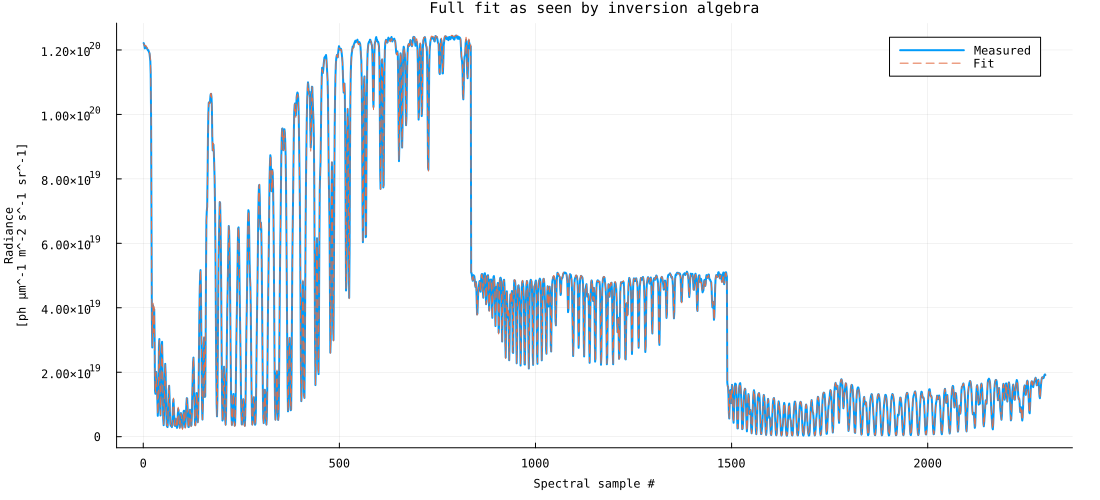

In [5]:
# This grabs the measured and modeled radiances from the solver object
measured = RE.get_measured(solver); # this is our `y`
modelled = RE.get_modeled(solver); # this is our `F(x)`

# Plot the multi-band fit
Plots.plot(measured, size=(1100, 500), linewidth=2, label="Measured", leftmargin=5Plots.mm, rightmargin=5Plots.mm);
Plots.plot!(modelled, linestyle=:dash, label="Fit")

Plots.xlabel!("Spectral sample #");
Plots.ylabel!("Radiance\n[$(buf.rt_buf.radiance_unit)]");

Plots.title!("Full fit as seen by inversion algebra")

## Closer look at the individual spectral windows and their spectral residuals

Of course we can also look at each individual retrieval window and inspect the spectral fits individually. The bottom panel for each plot features the relative residuals, meaning the ratio of residual over the noise-quivalent-radiance $\frac{\mathbf{F}(\mathbf{x}) - \mathbf{y}}{\mathbf{\varepsilon}}$. You can see the systematic residuals that still remain. Our implementation of the ACOS algorithm does not yet use so-called EOFs to fit for these systematic residuals during the retrieval.

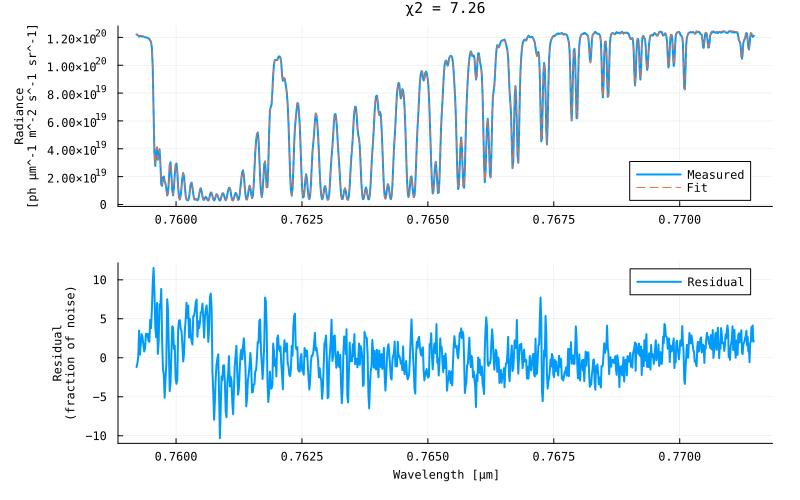

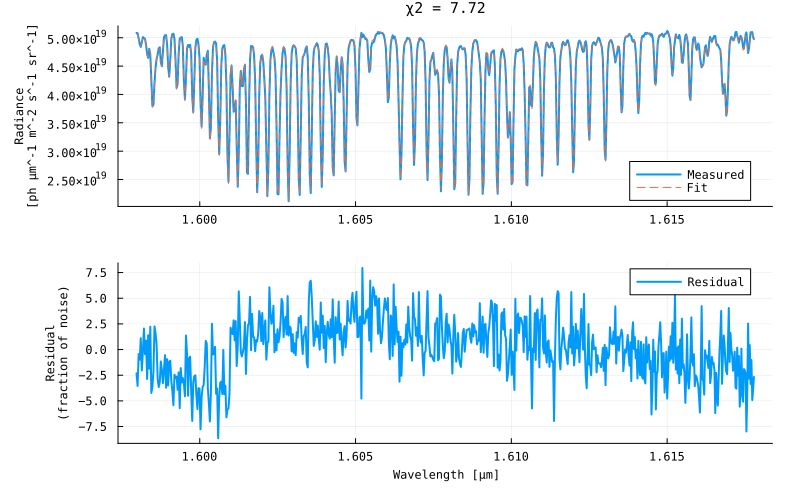

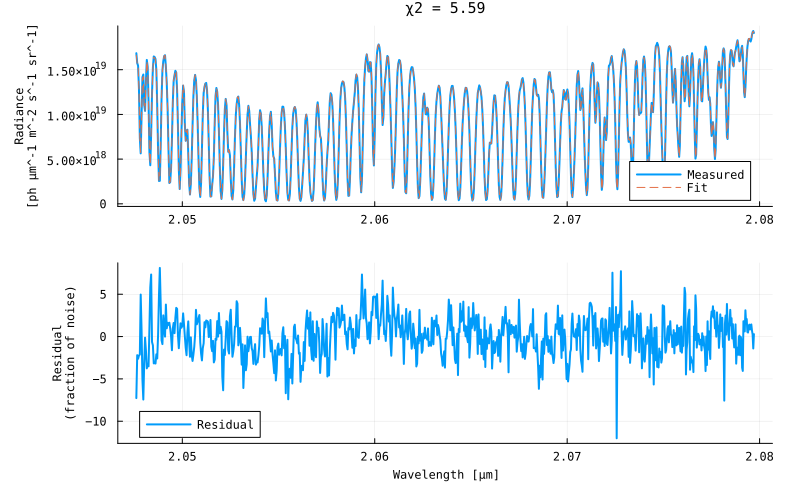

In [6]:
chi2 = RE.calculate_chi2(solver);

# Loop through each spectral window
for swin in buf.spectral_window

    # 
    rt = buf.rt[swin];

    # For this spectral window, grab the wavelenght, measured radiance, model radiance,
    # and noise-equivalent radiances. These will the vectors of the same length that can
    # be used for plotting.
    wavelength = RE.get_wavelength(solver, swin);
    measured = RE.get_measured(solver, swin);
    modeled = RE.get_modeled(solver, swin);
    noise = RE.get_noise(solver, swin);

    # We calculate the relative residuals by dividing the mismatch by the noise
    resid = @. (modeled - measured) / noise;

    # Create a two-panel plot
    
    # First plot - measured and modeled radiance
    p1 = Plots.plot(wavelength, measured, label="Measured", linewidth=2,
        leftmargin=5Plots.mm, rightmargin=5Plots.mm, bottommargin=5Plots.mm, size=(800, 500));
    Plots.plot!(wavelength, modeled, label="Fit", linestyle=:dash)

    
    Plots.title!(@sprintf "χ2 = %.2f" chi2[swin])
    Plots.ylabel!("Radiance\n[$(rt.radiance_unit)]")
    
    # Second plot - radiance residuals
    p2 = Plots.plot(wavelength, resid, label="Residual", linewidth=2,
        leftmargin=5Plots.mm, rightmargin=5Plots.mm, bottommargin=5Plots.mm);
    Plots.xlabel!("Wavelength [$(swin.ww_unit)]")
    Plots.ylabel!("Residual\n(fraction of noise)")
    
    
    disp_plot = plot(p1, p2, layout=(2, 1))
    display(disp_plot)
    
end

The above model spectra represent the "full" radiances generated by the forward model inside the algorithm, and has the instrument spectral response function (ISRF) applied to it. If we want to inspect the radiances as they are generated by the multiple-scattering RT code, we can do so. Those so-called "high-resolution radiances" from the last iteration are still accessible since they are held in a buffer.

We first select one of the spectral windows from the list `buf.spectral_window`, and call it `swin`. The `rt` object (which holds all that is necessary for ), that is accessed via the buffer `buf`, has to be indexed with that spectral window, so we can type `rt = buf.rt[swin]`, which allows us to access many of the underlying quantities that go into the radiative transfer calculations.

Note - the high-resolution radiances below are sun-normalized, meaning that they have to be multiplied by the solar model to provide radiances with physical units. Hence they also lack solar absorption lines.

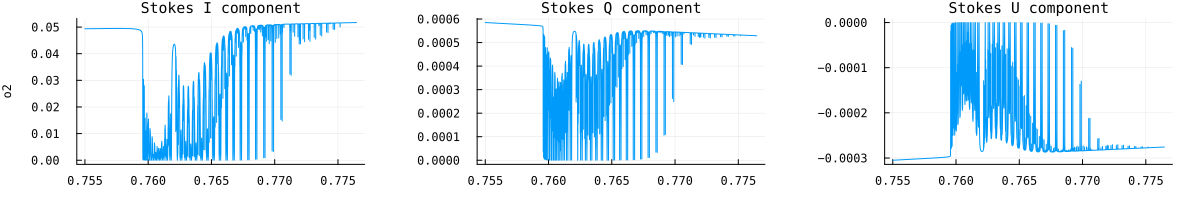

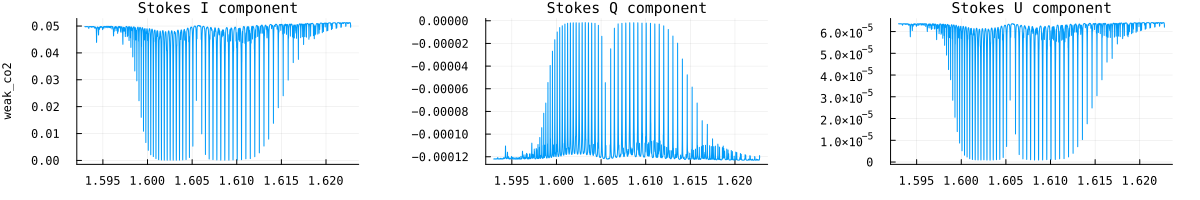

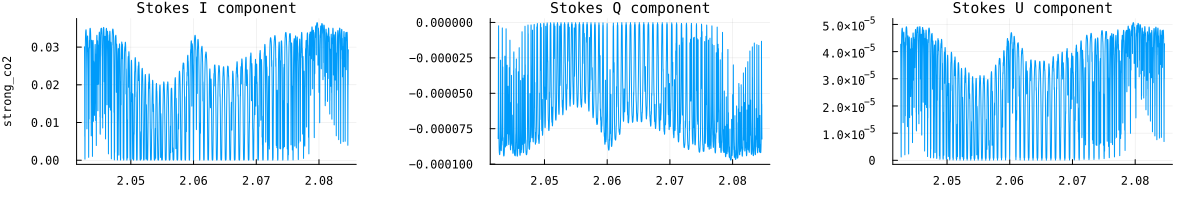

In [7]:
stokes_labels = ["I", "Q", "U"]

for swin in buf.spectral_window # Loop through each spectral window `swin`

    rt = buf.rt[swin];   
    hires_rad = rt.hires_radiance

    p = [] # List of plots
    for s in 1:size(hires_rad, 2)
        
        push!(p, # Add new plot to list
            Plots.plot(
                swin.wavelength_grid,
                hires_rad[:,s],
                label=nothing,
                size=(1200, 200),
            )
        )
        title!("Stokes $(stokes_labels[s]) component")

        if s == 1
            ylabel!(swin.window_name)
        end
            
    end
    
    disp_plot = plot(p..., layout=(1, 3))
    display(disp_plot)
    
end

## Inspect the atmospheric state

With the RetrievalToolbox software, atmospheric states can be temporarily **mutated**.

In [8]:
gases = filter(x -> x isa GasAbsorber, rt.scene.atmosphere.atm_elements) # Grabs all gases

p = []
for gas in gases
    
    push!(p,
        Plots.plot(
            gas.vmr_levels, # x-coord: aerosol tau
            rt.scene.atmosphere.pressure_levels, # y-coord: pressure layer (middle of level)
            label=nothing,
            marker=:circle, markersize=3,
            yformatter=x -> (@sprintf "%.0f" x),
            size=(900, 400),
            xlabel=(@sprintf "%s [%s]" gas.gas_name gas.vmr_unit)
        )
    )

end


disp_plot = plot(p..., layout=(1, length(gases)))
yflip!();
ylabel!("Pressure level [$(rt.scene.atmosphere.pressure_unit)]");
display(disp_plot)

LoadError: UndefVarError: `rt` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

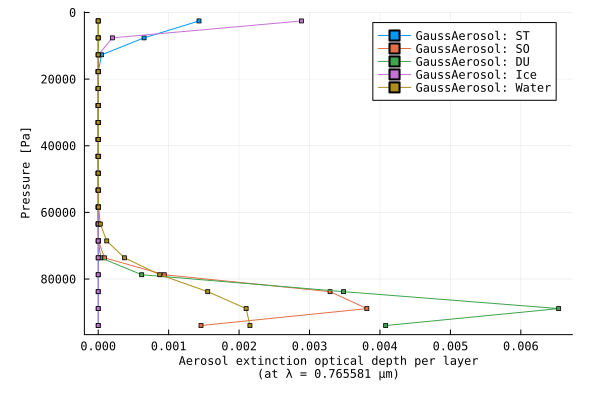

In [9]:
swin = buf.spectral_window[begin]; # Pull the first spectral window
rt = buf.rt[swin]; # Grab the associated RT object
scat_idx = get_scattering_index(swin); # For plotting purposes, let us grab the scattering index for this band
opt = rt.optical_properties; # The optical properties associated with this rt object


p = Plots.plot();
yflip!(); # Let us draw surface-down, TOA-up

for (aer, aer_tau) in opt.aerosol_tau

    Plots.plot!(p,
        aer_tau[scat_idx, :], # x-coord: aerosol tau
        rt.scene.atmosphere.pressure_layers, # y-coord: pressure layer (middle of level)
        label="$(aer)", legend=:topright,
        marker=:square, markersize=2,
        yformatter=x -> (@sprintf "%.0f" x),
        )

end

ylabel!("Pressure [$(rt.scene.atmosphere.pressure_unit)]");
xlabel!(@sprintf "Aerosol extinction optical depth per layer\n(at λ = %0.6f %s)" swin.wavelength_grid[scat_idx] swin.wavelength_unit)
display(p)

## Posterior analysis

We can look at the atmospheric state in terms of the Xgas, depending on which gases are present in our set-up. Remember that certain gases will be excluded depending on which bands were chosen for the retrieval.

In [10]:
# Calculate optimal estimation-related quantities..
q = RE.calculate_OE_quantities(solver);
h = RE.create_pressure_weights(buf.scene.atmosphere);
gas_co2 = RE.get_gas_from_name(buf.scene.atmosphere, "CO2");

idx = RE.idx_for_profile_sve(gas_co2, solver.state_vector);

In [11]:
RE.calculate_xgas(buf.scene.atmosphere)

Dict{String, Number} with 3 entries:
  "H2O" => 0.112651 %
  "CO2" => 413.354 ppm
  "O2"  => 0.2095

In [12]:
# Calculate XCO2 uncert

In [13]:
sqrt(h' * (q.Shat[idx, idx] * h)) # ucert in ppm

0.465211516536558

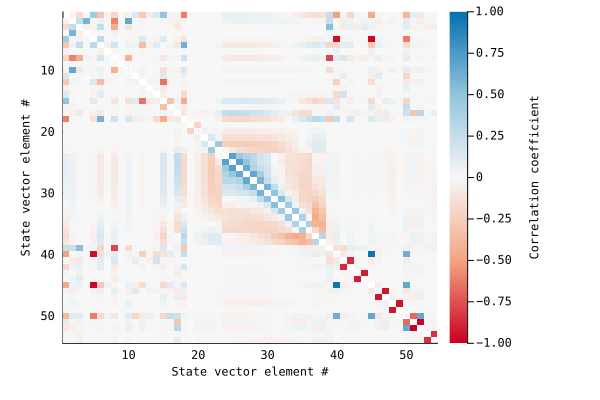

In [14]:
# Do a correlation matrix based on posterior covariance
C = similar(q.Shat);
for idx in CartesianIndices(C)
    i, j = idx.I

    if i != j
        C[i,j] = q.Shat[i,j] / sqrt(q.Shat[i,i] * q.Shat[j,j])
    else
        C[i,j] = NaN
    end

end

Plots.heatmap(C, yflip=true, clims=(-1,1), c=:RdBu_5,
    rightmargin=20Plots.mm,
    colorbar_title=" \n\nCorrelation coefficient", colorbar_titlefont=(8))
Plots.xlabel!("State vector element #")
Plots.ylabel!("State vector element #")

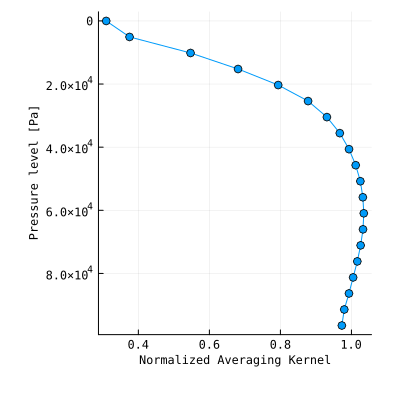

In [16]:
#=
    Calculate and plot the XCO2 averaging kernel (normalized)
=#

# This grabs the indices within the state vector that correspond 
# to the CO2 profile.
idx = RE.idx_for_profile_sve(gas_co2, solver.state_vector)

if length(idx) > 0

    # Calculate the normalized averaging kernel
    # (remember, we calculated the pressure weights as `h` before)
    ak_norm = (h' * q.AK[idx,idx])' ./ h
    
    # Plot it!
    Plots.plot(
        ak_norm,
        buf.scene.atmosphere.pressure_levels,
        marker=:o,
        yflip=true,
        label=nothing,
        size=(400,400)
        )
    Plots.xlabel!("Normalized Averaging Kernel")
    Plots.ylabel!("Pressure level [$(buf.scene.atmosphere.pressure_unit)]")

else

    @warn "Sorry - cannot plot XCO2 AK"
    @warn "Probably no CO2 band retrieved.."

end